Joseph Lannan and Jack Bess

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

g = 9.8067
# l = 1; m=1

def dphi1_dt (x, t, param = None):
  """ d phi_1 / dt = ...  """ 
  phi1 = x[0] 
  phi2 = x[1]
  p1 = x[2] # generalized/canonical momentum 
  p2 = x[3] 
  out = (p1 - p2 * np.cos(phi1-phi2)) / (1+np.sin(phi1-phi2)**2)
  return out

def dphi2_dt (x, t, param = None):
  """ d phi_2 / dt = ...  """
  phi1 = x[0]
  phi2 = x[1]
  p1 = x[2]
  p2 = x[3] 
  out = (2*p2 - p1 * np.cos(phi1-phi2)) / (1+np.sin(phi1-phi2)**2)
  return out

def dp1_dt (x, t, param = None):
  """ d p_1 / dt = ...  """
  phi1 = x[0]
  phi2 = x[1]
  p1 = x[2]
  p2 = x[3] 
  denom = 1+np.sin(phi1-phi2)**2
  out = ( -p1*p2*np.sin(phi1-phi2) + (p1**2+2*p2**2 - 2*p1*p2*np.cos(phi1-phi2))*0.5*np.sin(2*(phi1-phi2))/denom ) / denom - 2 * g *np.sin(phi1)
  return out

def dp2_dt (x, t, param = None):
  """ d p_2 / dt = ...  """
  phi1 = x[0]
  phi2 = x[1]
  p1 = x[2]
  p2 = x[3] 
  denom = 1+np.sin(phi1-phi2)**2
  out = ( p1*p2*np.sin(phi1-phi2) - (p1**2+2*p2**2 - 2*p1*p2*np.cos(phi1-phi2))*0.5*np.sin(2*(phi1-phi2))/denom ) / denom -   g *np.sin(phi2)
  return out

def double_pendulum(x, t, param=None):
  """ collecting all equation together into a vector """ 
  out = np.zeros( len(x) )
  out[0] = dphi1_dt (x, t)
  out[1] = dphi2_dt (x, t)
  out[2] = dp1_dt (x, t)
  out[3] = dp2_dt (x, t)
  return out 

def RK4(f, x , t , p, dt):
  """ complete the code below for 4th order Runge-Kutta  """
  K1 = f(x, t, p)
  K2 = f(x+K1*dt/2,t+dt/2)
  K3 = f(x+K2*dt/2,t+dt/2)
  K4 = f(x+K3*dt,t+dt)
  return (x + dt/6.0*( K1 + 2*K2 + 2*K3 + K4) )

def PM(data):
  """ Poincare map defined by phi_2 = 0 """
  out_phi=[]
  out_p=[]
  for i in range(len(data)-1):
    if ((data[i,1]*data[i+1,1]<0) ):
      out_phi.append(data[i,0])
      out_p.append(data[i,2])
  return (out_phi,out_p)

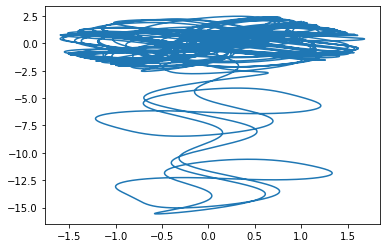

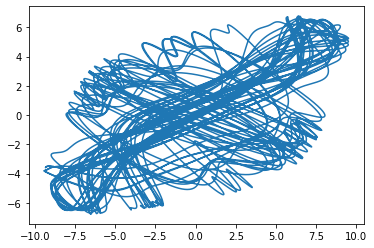

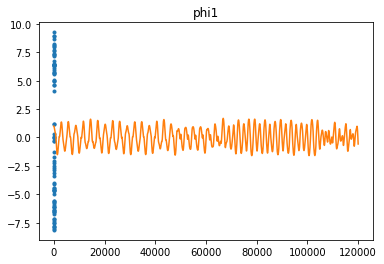

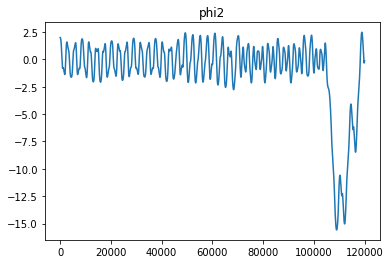

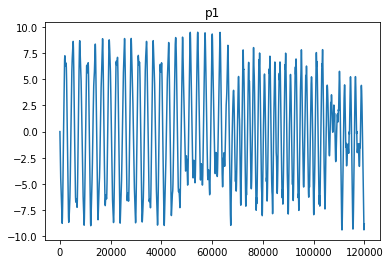

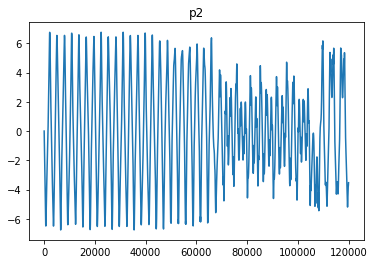

In [35]:
dt = 1e-3
t = 0 
x = np.zeros(4)
x[0] = 1
x[1] = 2
x[2] = 0
x[3] = 0


data = []

while t < 120:
  data.append(list(x))
  x_next =  RK4(double_pendulum, x , t , None, dt)
  t = t + dt 
  x = x_next 

data_plot=np.array(data)

plt.plot(data_plot[:,0],data_plot[:,1])
plt.show()

plt.plot(data_plot[:,2],data_plot[:,3])
plt.show()

(x,y)=PM(data_plot)
plt.plot(x,y,'.')

plt.title("phi1")
plt.plot(data_plot[:,0])
plt.show()
plt.title("phi2")
plt.plot(data_plot[:,1])
plt.show()
plt.title("p1")
plt.plot(data_plot[:,2])
plt.show()
plt.title("p2")
plt.plot(data_plot[:,3])
plt.show()

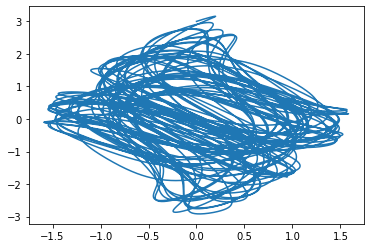

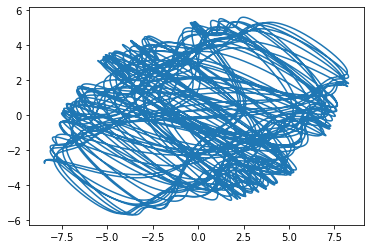

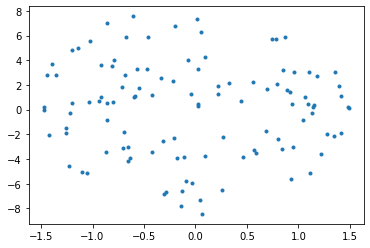

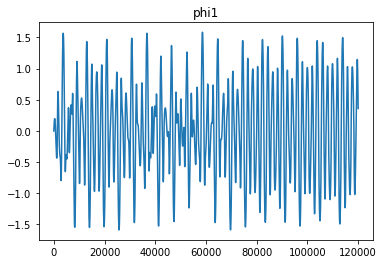

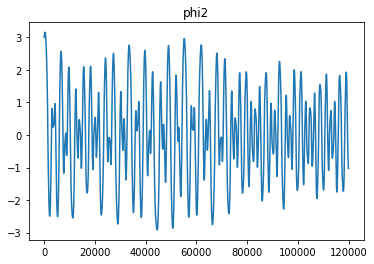

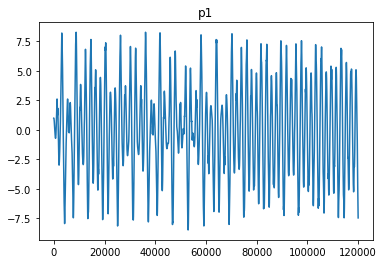

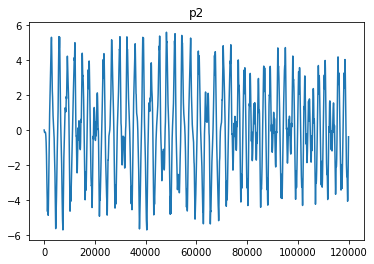

In [36]:
dt = 1e-3
t = 0 
x = np.zeros(4)
x[0] = 0
x[1] = 3
x[2] = 1
x[3] = 0


data = []

while t < 120:
  data.append(list(x))
  x_next =  RK4(double_pendulum, x , t , None, dt)
  t = t + dt 
  x = x_next 

data_plot=np.array(data)

plt.plot(data_plot[:,0],data_plot[:,1])
plt.show()

plt.plot(data_plot[:,2],data_plot[:,3])
plt.show()

(x,y)=PM(data_plot)
plt.plot(x,y,'.')
plt.show()

plt.title("phi1")
plt.plot(data_plot[:,0])
plt.show()
plt.title("phi2")
plt.plot(data_plot[:,1])
plt.show()
plt.title("p1")
plt.plot(data_plot[:,2])
plt.show()
plt.title("p2")
plt.plot(data_plot[:,3])
plt.show()

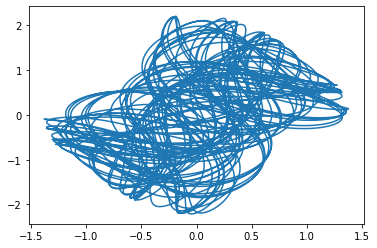

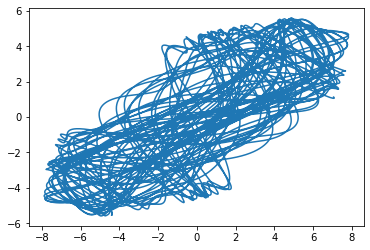

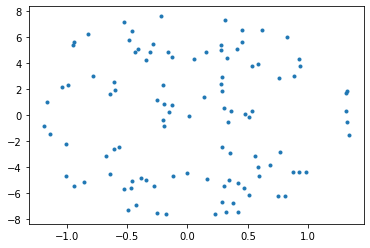

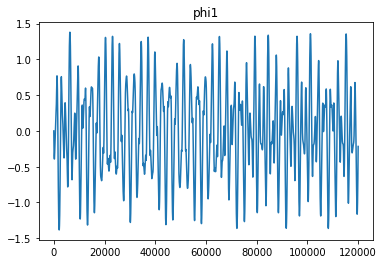

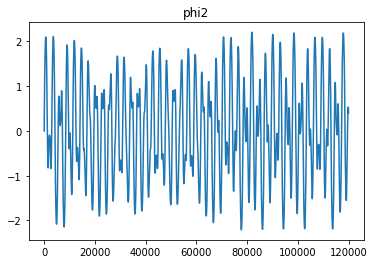

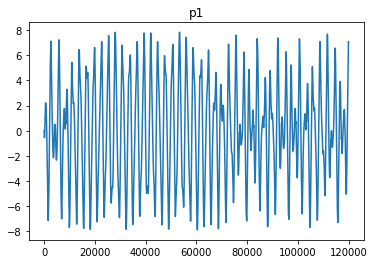

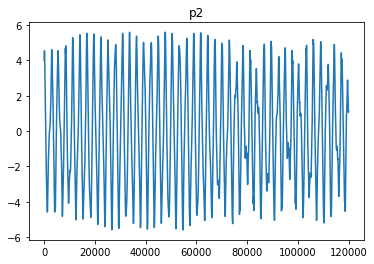

In [37]:
dt = 1e-3
t = 0 
x = np.zeros(4)
x[2] = 0
x[3] = 4

data = []

while t < 120:
  data.append(list(x))
  x_next =  RK4(double_pendulum, x , t , None, dt)
  t = t + dt 
  x = x_next 

data_plot=np.array(data)

plt.plot(data_plot[:,0],data_plot[:,1])
plt.show()

plt.plot(data_plot[:,2],data_plot[:,3])
plt.show()

plt.figure()
(x,y)=PM(data_plot)
plt.plot(x,y,'.')
plt.show()


plt.title("phi1")
plt.plot(data_plot[:,0])
plt.show()
plt.title("phi2")
plt.plot(data_plot[:,1])
plt.show()
plt.title("p1")
plt.plot(data_plot[:,2])
plt.show()
plt.title("p2")
plt.plot(data_plot[:,3])
plt.show()

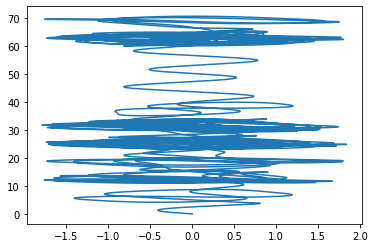

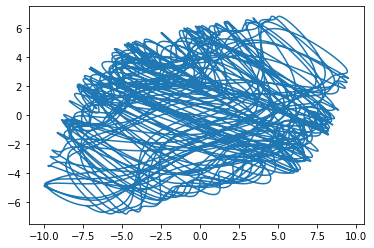

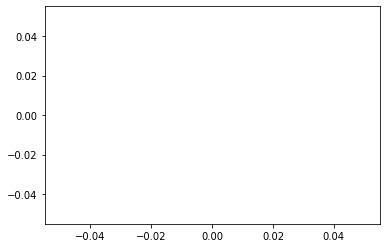

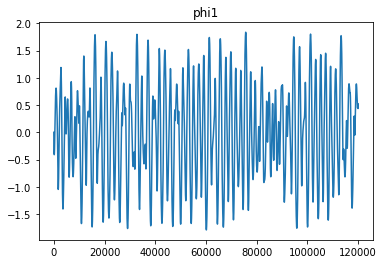

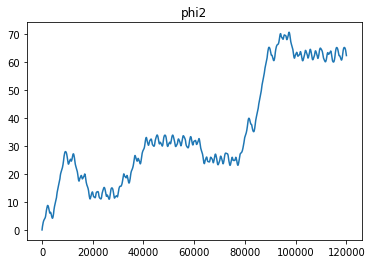

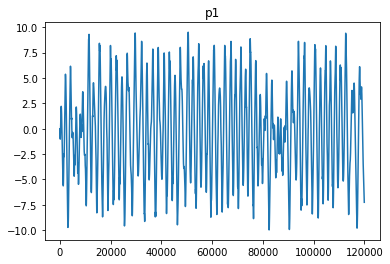

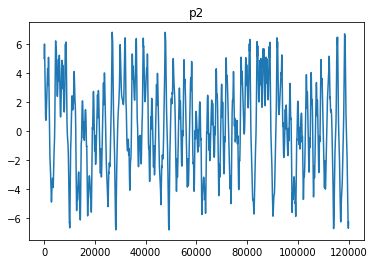

In [38]:
dt = 1e-3
t = 0 
x = np.zeros(4)
x[0] = 0
x[1] = 0
x[2] = 0
x[3] = 5

data = []

while t < 120:
  data.append(list(x))
  x_next =  RK4(double_pendulum, x , t , None, dt)
  t = t + dt 
  x = x_next 

data_plot=np.array(data)

plt.plot(data_plot[:,0],data_plot[:,1])
plt.show()

plt.plot(data_plot[:,2],data_plot[:,3])
plt.show()

plt.figure()
(x,y)=PM(data_plot)
plt.plot(x,y,'.')
plt.show()

plt.title("phi1")
plt.plot(data_plot[:,0])
plt.show()
plt.title("phi2")
plt.plot(data_plot[:,1])
plt.show()
plt.title("p1")
plt.plot(data_plot[:,2])
plt.show()
plt.title("p2")
plt.plot(data_plot[:,3])
plt.show()

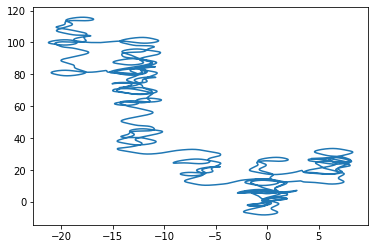

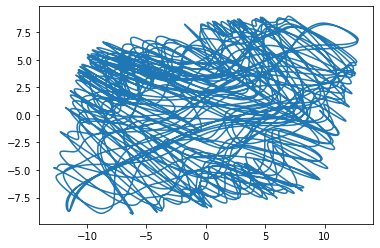

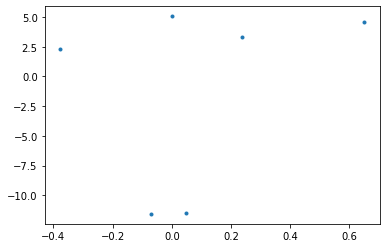

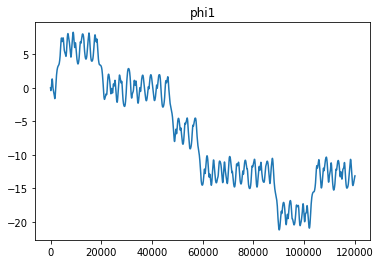

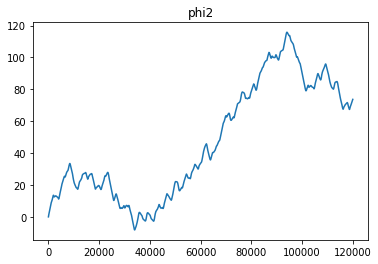

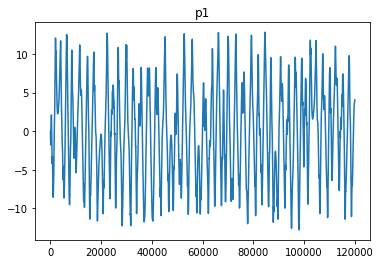

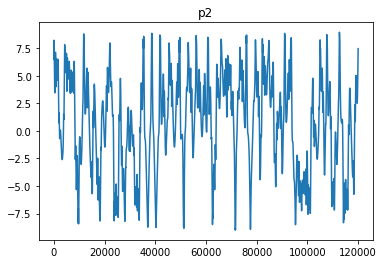

In [39]:
dt = 1e-3
t = 0 
x = np.zeros(4)
x[2] = 0
x[3] = 6.5

data = []

while t < 120:
  data.append(list(x))
  x_next =  RK4(double_pendulum, x , t , None, dt)
  t = t + dt 
  x = x_next 

data_plot=np.array(data)

plt.plot(data_plot[:,0],data_plot[:,1])
plt.show()

plt.plot(data_plot[:,2],data_plot[:,3])
plt.show()

plt.figure()
(x,y)=PM(data_plot)
plt.plot(x,y,'.')
plt.show()

plt.title("phi1")
plt.plot(data_plot[:,0])
plt.show()
plt.title("phi2")
plt.plot(data_plot[:,1])
plt.show()
plt.title("p1")
plt.plot(data_plot[:,2])
plt.show()
plt.title("p2")
plt.plot(data_plot[:,3])
plt.show()

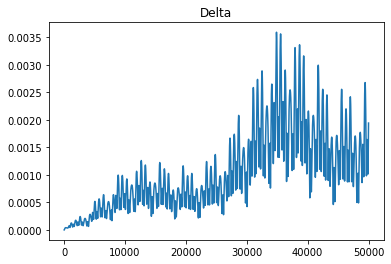

In [54]:
dt = 1e-3
t = 0 
x1 = np.zeros(4)
x1[2] = 0
x1[3] = 3

change = .0001

x2 = np.zeros(4)
x2[2] = x1[2] + change
x2[3] = x1[3]


data1 = []
data2 = []
deltas = []

while t < 50:
  data1.append(list(x1))
  data2.append(list(x2))
  x1_next =  RK4(double_pendulum, x1 , t , None, dt)
  x2_next =  RK4(double_pendulum, x2 , t , None, dt)
  t = t + dt 
  x1 = x1_next 
  x2 = x2_next 
  deltas.append( np.sqrt((x1_next[1]-x2_next[1])**2 + (x1_next[3]-x2_next[3])**2) )

plt.plot(deltas)
plt.title("Delta")
plt.show()



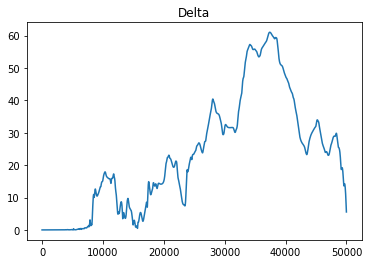

In [56]:
dt = 1e-3
t = 0 
x1 = np.zeros(4)
x1[2] = 0
x1[3] = 6.5

change = .0001

x2 = np.zeros(4)
x2[2] = x1[2] + change
x2[3] = x1[3]


data1 = []
data2 = []
deltas = []

while t < 50:
  data1.append(list(x1))
  data2.append(list(x2))
  x1_next =  RK4(double_pendulum, x1 , t , None, dt)
  x2_next =  RK4(double_pendulum, x2 , t , None, dt)
  t = t + dt 
  x1 = x1_next 
  x2 = x2_next 
  deltas.append( np.sqrt((x1_next[1]-x2_next[1])**2 + (x1_next[3]-x2_next[3])**2) )

plt.plot(deltas)
plt.title("Delta")
plt.show()
